In [110]:
#Imporing the libraries

import numpy as np
import datetime
import pandas as pd
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [ ]:
#Importing the data files

account = pd.read_csv('C:/Users/sakhtar/Downloads/Python-Group-Project-master/Python-Group-Project-master/data/data_berka/account.asc', sep=';')
card = pd.read_csv('C:/Users/sakhtar/Downloads/Python-Group-Project-master/Python-Group-Project-master/data/data_berka/card.asc', sep=';')
client = pd.read_csv('C:/Users/sakhtar/Downloads/Python-Group-Project-master/Python-Group-Project-master/data/data_berka/client.asc', sep=';')

In [112]:
#Defining the starting and end dates
start_date = datetime.datetime(1993,1,1)
end_date = datetime.datetime(1999,1,1)

In [ ]:
# function to convert a date to (days after start_date)
def convert_date_to_days(x):
    td = x - start_date
    return td.days

In [113]:
# function to convert a date to age at end_date
def convert_to_age_days(x):
    td = end_date - x
    return td.days

In [114]:
#Converting the Card issued date to a datetime object

card['issued'] = pd.to_datetime(card['issued'].str[:6], format='%y%m%d')

In [115]:
# check the date column for null values

card['issued'].isnull().sum()

0

In [116]:
#Convert the card issued date to days in number
card['card_issued_date'] = card['issued'].map(convert_date_to_days)
del card['issued']

In [117]:
# functions to convert the format of the birth_number.

# returns the middle two digits

def get_mid2_dig(x):
    return int(x/100) % 100

# returns the month of birth_number column.
def get_month(x):
    mth = get_mid2_dig(x)
    if mth > 50:
        return mth - 50
    else:
        return mth

# return the month (of birth_number)
def get_day(x):
    return x % 100

# returns the year (of birth_number)
def get_year(x):
    return int(x/10000)

# determine the gender 
def get_gender(x):
    mth = get_mid2_dig(x)
    if mth > 50:
        return 'F'
    else:
        return 'M'

# convert the birth_number into date
def convert_int_to_date(x):
    yr = get_year(x) + 1900
    mth = get_month(x)
    day = get_day(x)
    return datetime.datetime(yr, mth, day)

# convert birth_number into age.
def convert_birthday_to_age(x):
    yr = get_year(x) + 1900
    mth = get_month(x)
    day = get_day(x)
    return convert_to_age_days(datetime.datetime(yr,mth,day))/365
    
client['client_age'] = client['birth_number'].map(convert_birthday_to_age)
client['client_gender'] = client['birth_number'].map(get_gender)
del client['birth_number']

In [120]:
# rename columns in Card
card = card.rename(columns={'type': 'card_type'})
card.head()

,card_id,disp_id,card_type,card_issued_date
0,1005,9285,classic,310
1,104,588,classic,383
2,747,4915,classic,400
3,70,439,classic,403
4,577,3687,classic,410


In [121]:
# Rename columns in Client dataset.
client = client.rename(columns={'district_id': 'client_district_id'})
client.head()

,client_id,client_district_id,client_age,client_gender
0,1,18,28.071233,F
1,2,1,53.942466,M
2,3,1,58.268493,F
3,4,5,42.112329,M
4,5,5,38.523288,F


In [122]:
# Export the cleaned Client Data set
client.to_csv("cleaned_client.csv", index=False)

(array([  6., 150., 426., 345., 387., 358., 382., 372., 344., 371., 372.,
        392., 367., 254., 205., 189., 186., 185.,  66.,  12.]),
 array([11.27123288, 15.0790411 , 18.88684932, 22.69465753, 26.50246575,
        30.31027397, 34.11808219, 37.92589041, 41.73369863, 45.54150685,
        49.34931507, 53.15712329, 56.96493151, 60.77273973, 64.58054795,
        68.38835616, 72.19616438, 76.0039726 , 79.81178082, 83.61958904,
        87.42739726]),
 <a list of 20 Patch objects>)

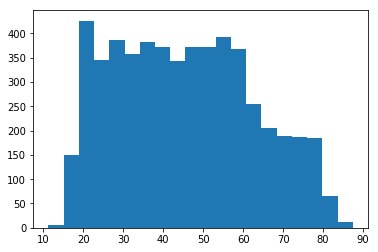

In [123]:
#Plotting age of clients
plt.hist(client['client_age'], 20)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001FA0078A780>],
      dtype=object)

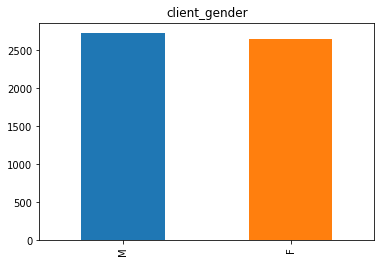

In [124]:
#Plotting gender of clients
client['client_gender'].value_counts().plot(kind='bar', subplots=True)

In [125]:
# Renaming columns for Account
account = account.rename(columns={'district_id': 'account_district_id'})

account.head()

,account_id,account_district_id,frequency,date
0,576,55,POPLATEK MESICNE,930101
1,3818,74,POPLATEK MESICNE,930101
2,704,55,POPLATEK MESICNE,930101
3,2378,16,POPLATEK MESICNE,930101
4,2632,24,POPLATEK MESICNE,930102


In [126]:
#Converting date columns in the Account table
account['date'] = account['date'].map(convert_int_to_date)
account['account_date_opened'] = account['date'].map(convert_date_to_days)
del account['date']

In [127]:
#Checking the frequency ofAccount table
account['frequency'].value_counts()

POPLATEK MESICNE      4167
POPLATEK TYDNE         240
POPLATEK PO OBRATU      93
Name: frequency, dtype: int64

In [128]:
# Translate frequency of transactions to English.
def convert_freq_to_eng(x):
    if x == 'POPLATEK MESICNE':
        return 'MONTHLY'
    elif x == 'POPLATEK TYDNE':
        return 'WEEKLY'
    elif x == 'POPLATEK PO OBRATU':
        return 'TRANSACTION'
    else:
        return 'UNKNOWN'
    
account['frequency'] = account['frequency'].map(convert_freq_to_eng)

In [129]:
# Renaming columns for Account

account = account.rename(columns={'frequency': 'statement_freq'})
account.head()

,account_id,account_district_id,statement_freq,account_date_opened
0,576,55,MONTHLY,0
1,3818,74,MONTHLY,0
2,704,55,MONTHLY,0
3,2378,16,MONTHLY,0
4,2632,24,MONTHLY,1


In [130]:
# Export the cleaned Account Data set
account.to_csv("cleaned_account.csv", index=False)

In [ ]:
# Export the cleaned Card Data set
card.to_csv("cleaned_card.csv", index=False)